<h1><center>SD 210 : Machine Learning - Classification Trees</center></h1>

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
%run 'tparbressource.py'

### Question 2:

In [4]:
gen_data = rand_checkers(n1=114, n2=114, n3=114, n4=114, sigma=0.1)
gen_data.shape

(448, 3)

In [5]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(gen_data[:, 0:2], gen_data[:, 2])
dtc.tree_.max_depth

10

In [6]:
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("gen_data")

'gen_data.pdf'

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    gen_data[:, 0:2], gen_data[:, 2], test_size=0.2, random_state=43)

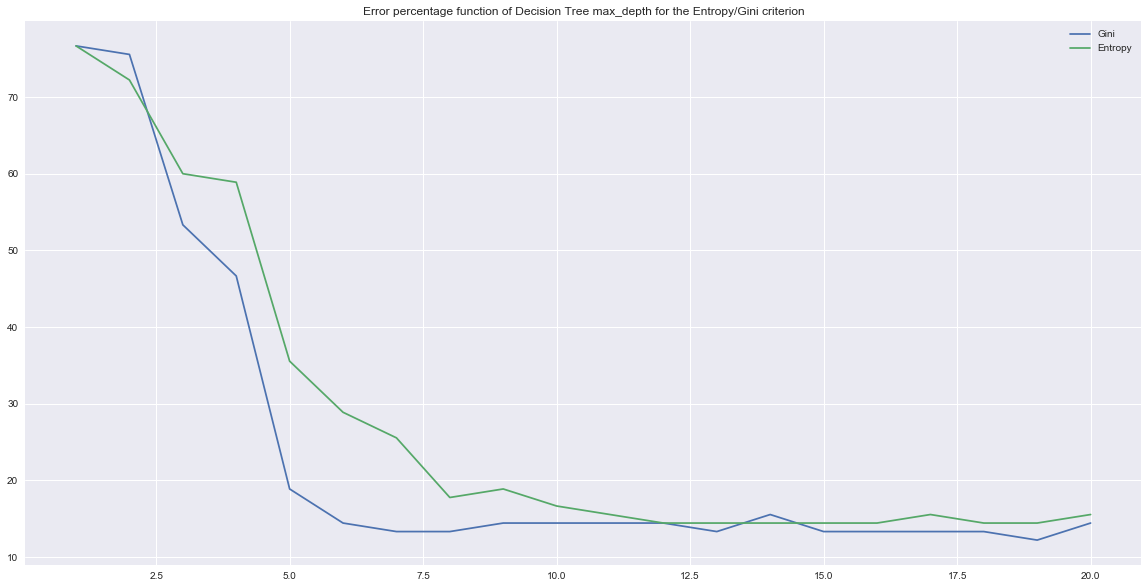

In [8]:
max_depth = 20
# Gini criterion error
gini_acc = np.array([])
for i in range(1,21):
    dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth=i)
    dtc = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    gini_acc = np.append(gini_acc,dtc.score(X_test, y_test))
plt.plot(range(1,21), (1 - gini_acc)*100)
# Entropy criterion error
entropy_acc = np.array([])
for i in range(1,21):
    dtc = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    dtc = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    entropy_acc = np.append(entropy_acc,dtc.score(X_test, y_test))
plt.plot(range(1,21), (1 - entropy_acc)*100)
plt.title("Error percentage function of Decision Tree max_depth for the Entropy/Gini criterion")
plt.legend(["Gini","Entropy"])
plt.show()

### Question 3:

The best max_depth is = 11 with an accuracy of 85.5555555556%


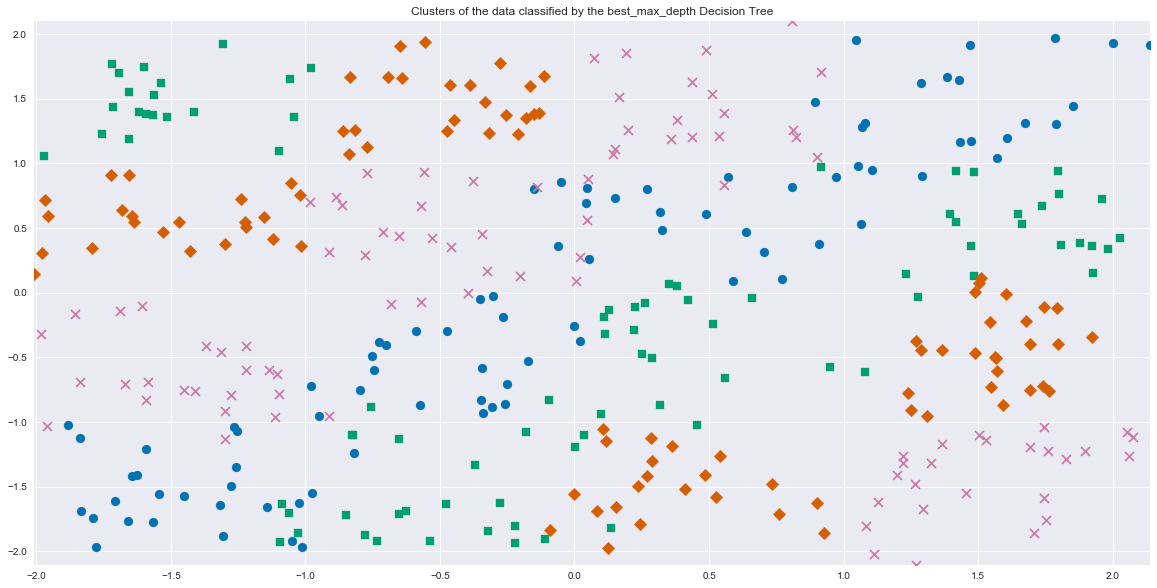

In [9]:
# For the entropy
def bmd(acc_vect):
    return np.argmax(entropy_acc)
best_max_depth = bmd(entropy_acc)
print("The best max_depth is = " + str(best_max_depth) +
      " with an accuracy of " + str(np.max(entropy_acc) * 100) + "%")
dtc = tree.DecisionTreeClassifier(
    criterion="entropy", max_depth=best_max_depth)
dtc = dtc.fit(X_train, y_train)
entropy_dtc = dtc.tree_
# y_pred = dtc.predict(X_test)
plot_2d(X_train, y_train)
plt.title("Clusters of the data classified by the best_max_depth Decision Tree")
plt.show()

### Question 4:

In [10]:
dot_data = tree.export_graphviz(dtc, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("gen_data_best_md")

'gen_data_best_md.pdf'

### Question 5:

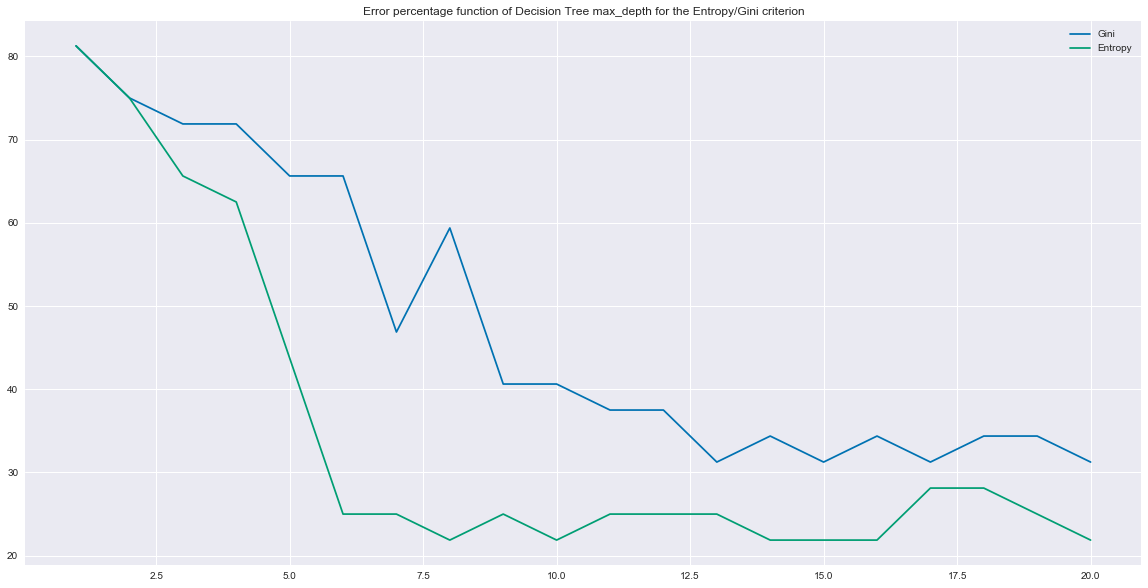

In [11]:
# new data composed of 160 samples base on the decision tree of the question 2
data_q5 = rand_checkers(n1=40, n2=40, n3=40, n4=40, sigma=0.1)
X_train, X_test, y_train, y_test = train_test_split(
    data_q5[:, 0:2], data_q5[:, 2], test_size=0.2, random_state=43)

# Compute the accuracy of the DT for diffrent depths and then plot the
# error curve for both criterion `gini` and `entropy`
max_depth = 20
# Gini criterion error
gini_acc = np.array([])
for i in range(1, 21):
    dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth=i)
    dtc = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    gini_acc = np.append(gini_acc, dtc.score(X_test, y_test))
plt.plot(range(1, 21), (1 - gini_acc) * 100)

# Entropy criterion error
entropy_acc = np.array([])
for i in range(1, 21):
    dtc = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    dtc = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    entropy_acc = np.append(entropy_acc, dtc.score(X_test, y_test))
plt.plot(range(1, 21), (1 - entropy_acc) * 100)

plt.title("Error percentage function of Decision Tree max_depth for the Entropy/Gini criterion")
plt.legend(["Gini", "Entropy"])
plt.show()

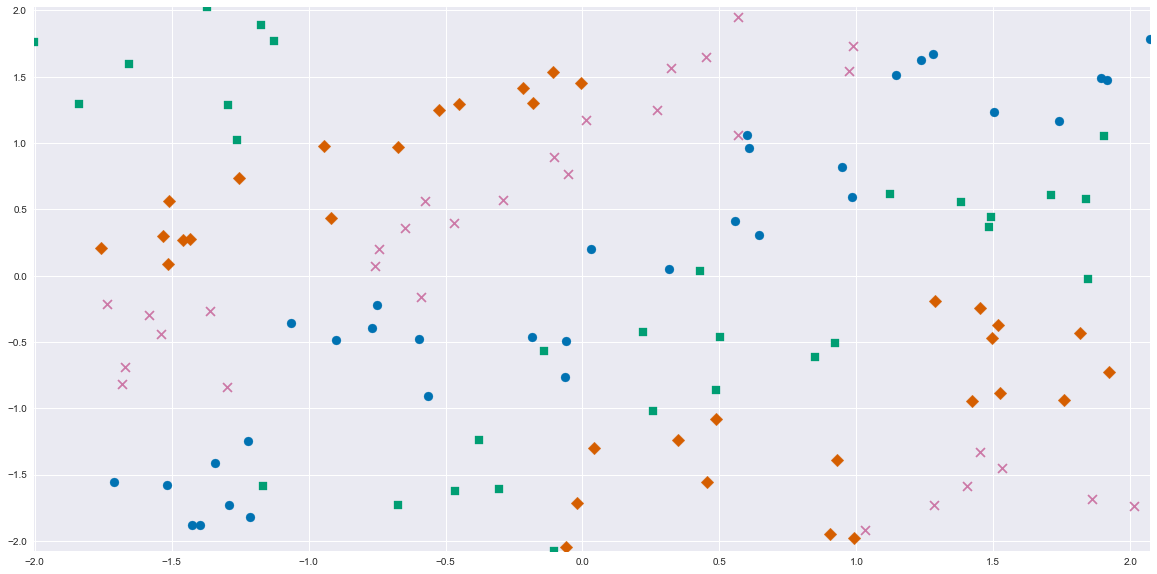

In [12]:
plot_2d(X_train, y_train)
plt.show()

### Question 6:

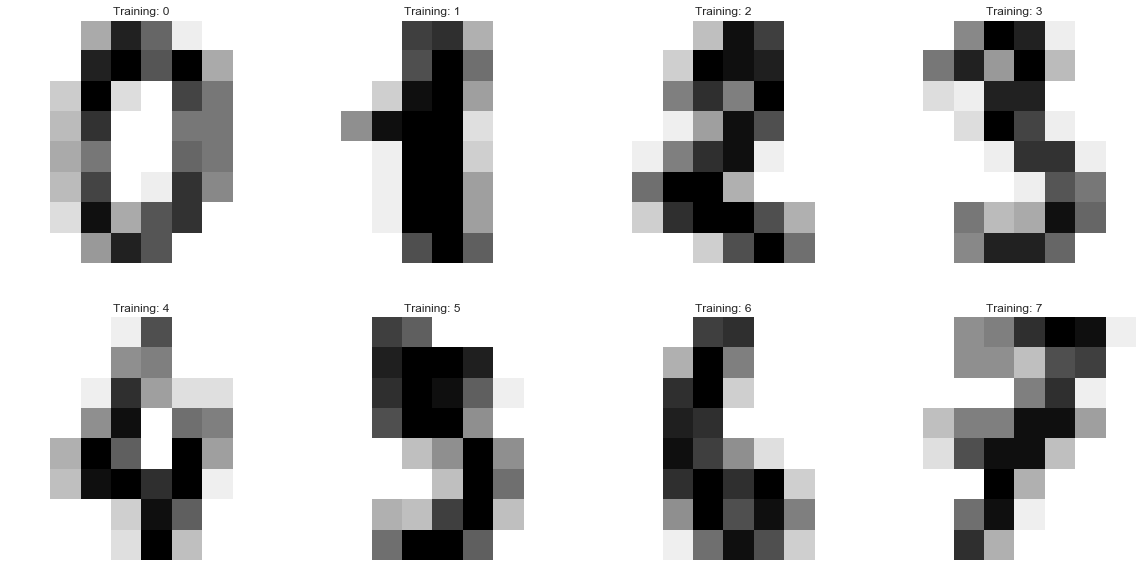

In [13]:
from sklearn import datasets
digits = datasets.load_digits()
clf = tree.DecisionTreeClassifier()

img_label = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(img_label[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    
# digits.data represents the flatenned representation of the 8x8 handwritten numbers
plt.show()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=43)

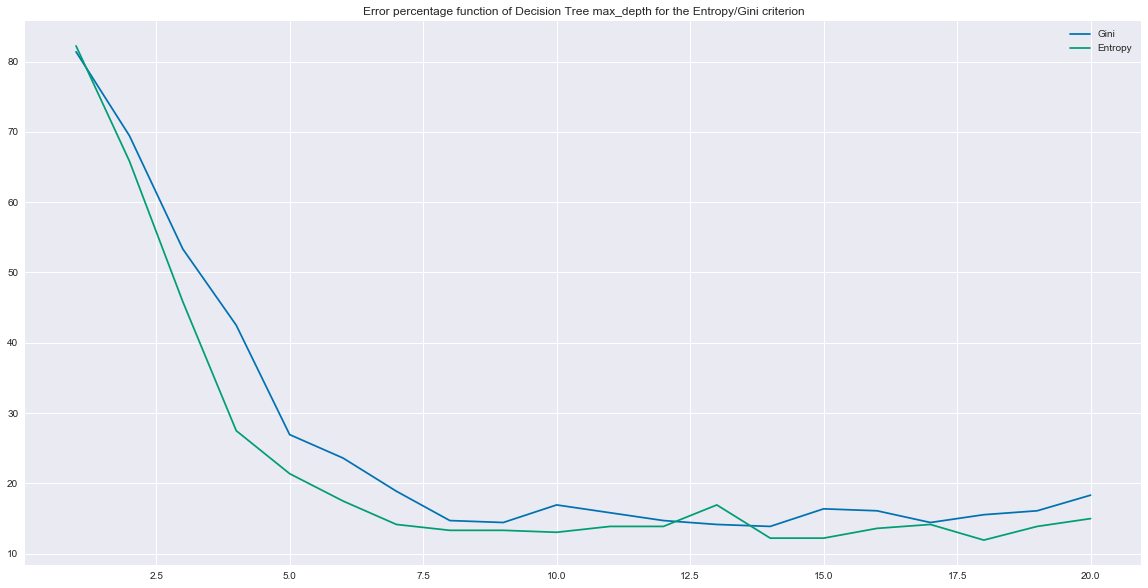

In [14]:
max_depth = 20
# Gini criterion error
gini_acc = np.array([])
for i in range(1, 21):
    clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=i)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    gini_acc = np.append(gini_acc, clf.score(X_test, y_test))
plt.plot(range(1, 21), (1 - gini_acc) * 100)
# Entropy criterion error
entropy_acc = np.array([])
for i in range(1, 21):
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    entropy_acc = np.append(entropy_acc, clf.score(X_test, y_test))
plt.plot(range(1, 21), (1 - entropy_acc) * 100)
plt.title("Error percentage function of Decision Tree max_depth for the Entropy/Gini criterion")
plt.legend(["Gini", "Entropy"])
plt.show()

In [15]:
# For the entropy
best_max_depth = bmd(entropy_acc)
print("The best max_depth is = " + str(best_max_depth) +
      " with an accuracy of " + str(np.max(entropy_acc) * 100) + "%")
clf = tree.DecisionTreeClassifier(
    criterion="entropy", max_depth=best_max_depth)
clf = clf.fit(X_train, y_train)

The best max_depth is = 17 with an accuracy of 88.0555555556%


In [16]:
# Visualize the decision tree with the best precision score
digits_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(digits_data)
graph.render("digits_data_best_md")

'digits_data_best_md.pdf'

<h3>Test the accuracy of the obtained model (trained with the digits dataset provided by sklearn) on a similarly formatted dataset</h3>

In [17]:
import urllib
# Testing the model on another dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra"
raw_data = urllib.request.urlopen(url)
digi = np.genfromtxt(raw_data, delimiter=',')
xx, yy = digi[:, :-1], digi[:, -1:].squeeze()
xx.shape, yy.shape
pred = clf.predict(xx)

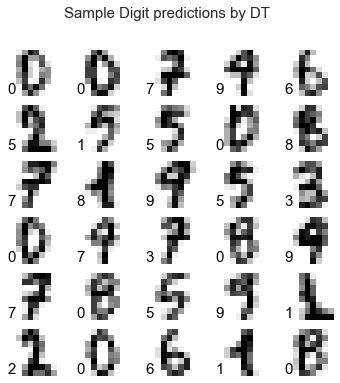

The accuracy of the decision tree is  = 82.7360711483%


In [18]:
# A sample of the prediction vector associated with the images
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Sample Digit predictions by DT', fontsize=15, alpha=2)
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(xx[i, :].reshape(8, 8), cmap=plt.cm.binary)
    ax.text(-1, 7, pred[i].astype(int), fontsize=15, color='black', alpha=2)
plt.show()
print("The accuracy of the decision tree is  = " + str(clf.score(xx,yy)*100)+"%")

### Question 7:

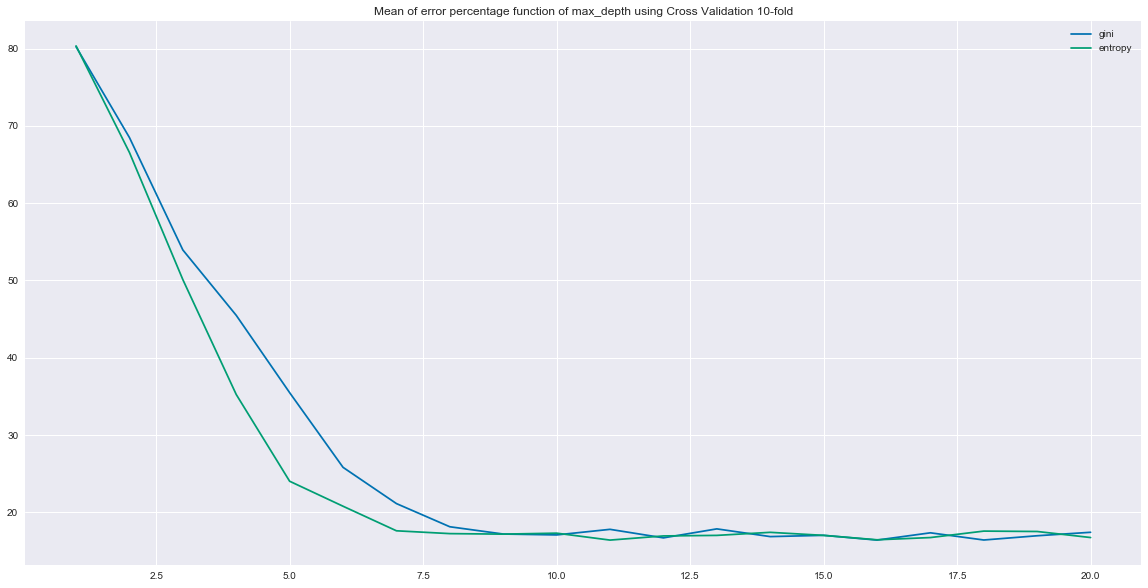

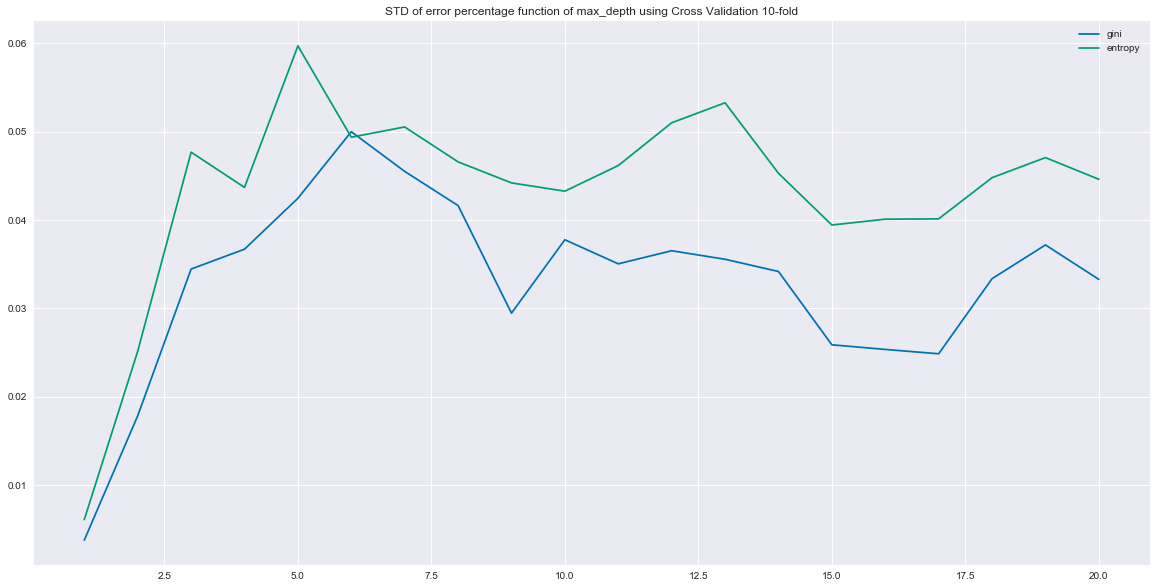

In [19]:
from sklearn.model_selection import cross_val_score
cv_acc_mean_gini = np.array([])
cv_acc_mean_entropy = np.array([])
cv_acc_std_gini = np.array([])
cv_acc_std_entropy = np.array([])
max_depth = 20
for i in range(1,21):
    clf_gini = tree.DecisionTreeClassifier(criterion="gini", max_depth=i)
    clf_entropy = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    scores_gini = cross_val_score(clf_gini,digits.data, digits.target, cv = 10)
    scores_entropy = cross_val_score(clf_entropy, digits.data, digits.target, cv=10)
    cv_acc_mean_gini = np.append(cv_acc_mean_gini, np.mean(scores_gini))
    cv_acc_mean_entropy = np.append(cv_acc_mean_entropy, np.mean(scores_entropy))
    # for the representation of the standard deviation evolution with max_depth
    cv_acc_std_gini = np.append(cv_acc_std_gini, np.std(scores_gini))
    cv_acc_std_entropy = np.append(cv_acc_std_entropy, np.std(scores_entropy))
plt.plot(range(1,21),(1-cv_acc_mean_gini)*100)
plt.plot(range(1,21), (1-cv_acc_mean_entropy)*100)
plt.legend(["gini", "entropy"])
plt.title("Mean of error percentage function of max_depth using Cross Validation 10-fold")
plt.show()
plt.plot(range(1,21),cv_acc_std_gini)
plt.plot(range(1,21), cv_acc_std_entropy)
plt.legend(["gini", "entropy"])
plt.title("STD of error percentage function of max_depth using Cross Validation 10-fold")
plt.show()

In [20]:
bmd_gini = bmd(cv_acc_mean_gini)
print("The best max_depth is = " + str(bmd_gini) +
      " with an accuracy of " + str(np.max(cv_acc_mean_gini) * 100) + "%" + " and a standard deviation of " + str(cv_acc_std_gini[bmd_gini]))
bmd_entropy = bmd(cv_acc_mean_entropy)
print("The best max_depth is = " + str(bmd_entropy) +
      " with an accuracy of " + str(np.max(cv_acc_mean_entropy) * 100) + "%" + " and a standard deviation of " + str(cv_acc_std_entropy[bmd_entropy]))

clf_gini = tree.DecisionTreeClassifier(criterion="gini", max_depth=bmd_gini)
clf_entropy = tree.DecisionTreeClassifier(
    criterion="entropy", max_depth=bmd_entropy)

The best max_depth is = 17 with an accuracy of 83.5898145008% and a standard deviation of 0.033366097538
The best max_depth is = 17 with an accuracy of 83.5903907373% and a standard deviation of 0.0448010465625


### Question 8:

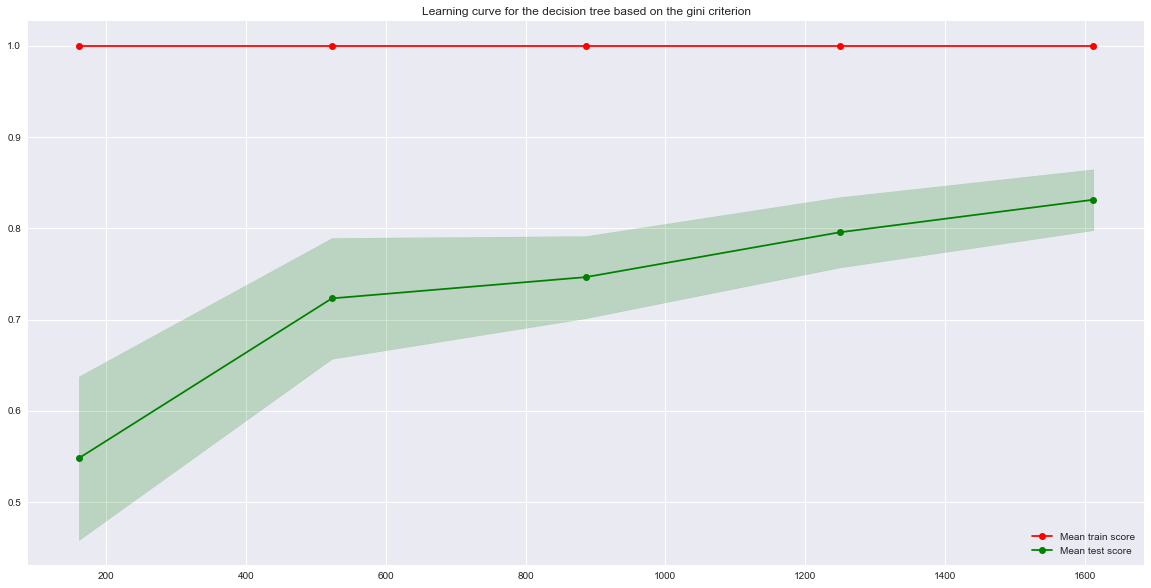

In [21]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    clf_gini, digits.data, digits.target, cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g")
plt.legend(["Mean train score", "Mean test score"], loc=4)
plt.title("Learning curve for the decision tree based on the gini criterion")
plt.show()

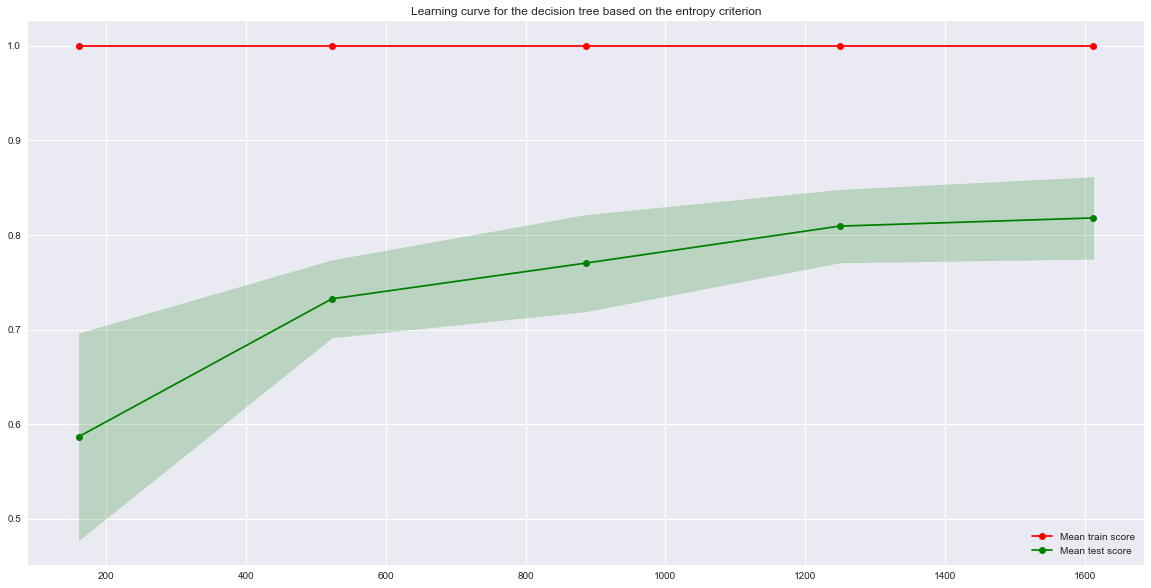

In [22]:
train_sizes, train_scores, test_scores = learning_curve(
    clf_entropy, digits.data, digits.target, cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g")
plt.legend(["Mean train score", "Mean test score"], loc=4)
plt.title("Learning curve for the decision tree based on the entropy criterion")
plt.show()